##**Importing important packages**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import os
from pathlib import Path

import tensorflow as tf

##**Downloading and unzipping the dataset and model**

In [12]:
!wget "https://github.com/ParulParima/Indian-Currency-Classification/archive/refs/heads/main.zip" 


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
!unzip main.zip; rm main.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


##**Train and validation dataset preparation**

In [15]:
import tensorflow as tf

train_dir = r'C:\Users\yogan\Downloads\Indian-Currency-Classification\Indian-Currency-Classification\train'

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
          train_dir, 
          labels='inferred', 
          label_mode='int',
          class_names=['10', '20', '50', '100', '200', '500', '2000'], 
          color_mode='rgb', 
          batch_size=32, 
          image_size=(128, 128),  # This resizes the images
          shuffle=True, 
          seed=123, 
          validation_split=0.2, 
          subset='training',
          interpolation='bicubic', 
          follow_links=False
        )

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
          train_dir, 
          labels='inferred', 
          label_mode='int',
          class_names=['10', '20', '50', '100', '200', '500', '2000'], 
          color_mode='rgb', 
          batch_size=32, 
          image_size=(128, 128), 
          shuffle=True, 
          seed=123, 
          validation_split=0.2, 
          subset='validation',
          interpolation='bicubic', 
          follow_links=False
        )


Found 1239 files belonging to 7 classes.
Using 992 files for training.
Found 1239 files belonging to 7 classes.
Using 247 files for validation.


In [16]:
def normalize(image,label):
  """
    Returns normalized image and its label
  """
  image = tf.cast(image/255. ,tf.float32)
  return image,label

In [17]:
# Normalizing dataset for better accuracy

train_dataset = train_dataset.map(normalize)
validation_dataset = validation_dataset.map(normalize)

##**Check Inference on the saved model**##

In [23]:
import tensorflow as tf
from keras.layers import TFSMLayer

# Path to the model directory
model_path = r'C:\Users\yogan\Downloads\Indian-Currency-Classification\Indian-Currency-Classification\model'

try:
    # Load the model using TFSMLayer for the SavedModel format
    model = TFSMLayer(model_path, call_endpoint='serving_default')

    # Check the model's architecture
    model.summary()
except Exception as e:
    print(f"Error loading model: {e}")


Error loading model: '_UserObject' object has no attribute 'add_slot'


##**Model Architecture**

In [24]:
model = tf.keras.Sequential([
            
            tf.keras.layers.Conv2D(64, (1, 1), input_shape=(128, 128, 3)),
            tf.keras.layers.BatchNormalization(axis=-1),
            tf.keras.layers.Activation('relu'),
            
            tf.keras.layers.Conv2D(32, (3, 3)),
            tf.keras.layers.BatchNormalization(axis=-1),
            tf.keras.layers.Activation('relu'),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

            tf.keras.layers.Conv2D(16, (3, 3)),
            tf.keras.layers.BatchNormalization(axis=-1),
            tf.keras.layers.Activation('relu'),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.50),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.30),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(7),
            tf.keras.layers.Activation('softmax')
          ])

C:\Users\yogan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 61, 61, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 61, 61, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 61, 61, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       921,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 7)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 947,767 (3.62 MB)

 Trainable params: 947,543 (3.61 MB)

 Non-trainable params: 224 (896.00 B)

##**Model optimization definition**

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy']
    )

##**Training Model**

In [27]:
model.fit(train_dataset,epochs=50)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.1533 - loss: 2.3067
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.2025 - loss: 1.9184
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.2548 - loss: 1.8065
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.3186 - loss: 1.7004
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.3758 - loss: 1.5493
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.4371 - loss: 1.3937
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.4928 - loss: 1.2708
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.5965 - loss: 1.0947
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5878 - loss: 1.0714
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.6420 - loss: 0.9605
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.6968 - loss: 0.8354
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.7277 - lo

##**Evaluating the model on the validation dataset**

In [28]:
val_loss, val_acc = model.evaluate(validation_dataset, verbose='auto')
print(f"Validation:\n\tloss:{val_loss} \n\taccuracy:{val_acc}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - accuracy: 0.8665 - loss: 0.3090
Validation:
	loss:0.3562302589416504 
	accuracy:0.8582996129989624


##**Test Data Prepartion**

###**Extracting test images for results**

In [29]:
test_dir = r'C:\Users\yogan\Downloads\Indian-Currency-Classification\Indian-Currency-Classification\test'

test_imageID = []
# r=root, d=directories, f = files

for r, d, f in os.walk(test_dir, topdown=True):
    for file in f:
      if '.jpg' in file:
          test_imageID.append(Path(file).stem)
test_imageID = sorted(test_imageID)

In [31]:
test_dir = r'C:\Users\yogan\Downloads\Indian-Currency-Classification\Indian-Currency-Classification\test'  # Replace with your test dataset directory

# Create test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels=None,  # No labels since you're predicting
    label_mode=None,  # No labels
    class_names=None,  # No class names needed for inference
    color_mode='rgb',  # Color mode
    batch_size=1,  # Use batch size of 1 for individual predictions
    shuffle=False,  # No shuffling for test dataset
    image_size=(128, 128),  # Resize images to 128x128
    interpolation='bicubic',  # Interpolation method
    follow_links=False  # Whether to follow symlinks
)

# To see the number of images in the test dataset
print(f"Number of images in test dataset: {len(test_dataset)}")


Found 55 files.
Number of images in test dataset: 55


In [32]:
def normalize_test(image):
  """
    Returns normalized image and its label
  """
  image = tf.cast(image/255. ,tf.float32)
  return image

In [33]:
# # Normalizing dataset
test_dataset = test_dataset.map(normalize_test)

##**Inference on test data**

In [34]:
predictions = model.predict(test_dataset)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


In [35]:
pred_category = np.argmax(predictions,axis = 1)     # Extracting index of the label with maximum probability

In [36]:
labels_name = ['10', '20', '50', '100', '200', '500', '2000']
pred_output_labels = [labels_name[i] for i in pred_category]

##**Visualizing the output predictions**

In [37]:
test_images = list(test_dataset.as_numpy_iterator()) # Returns an iterable over the elements of the dataset, with their tensors converted to numpy arrays
num_test_images = len(test_images)

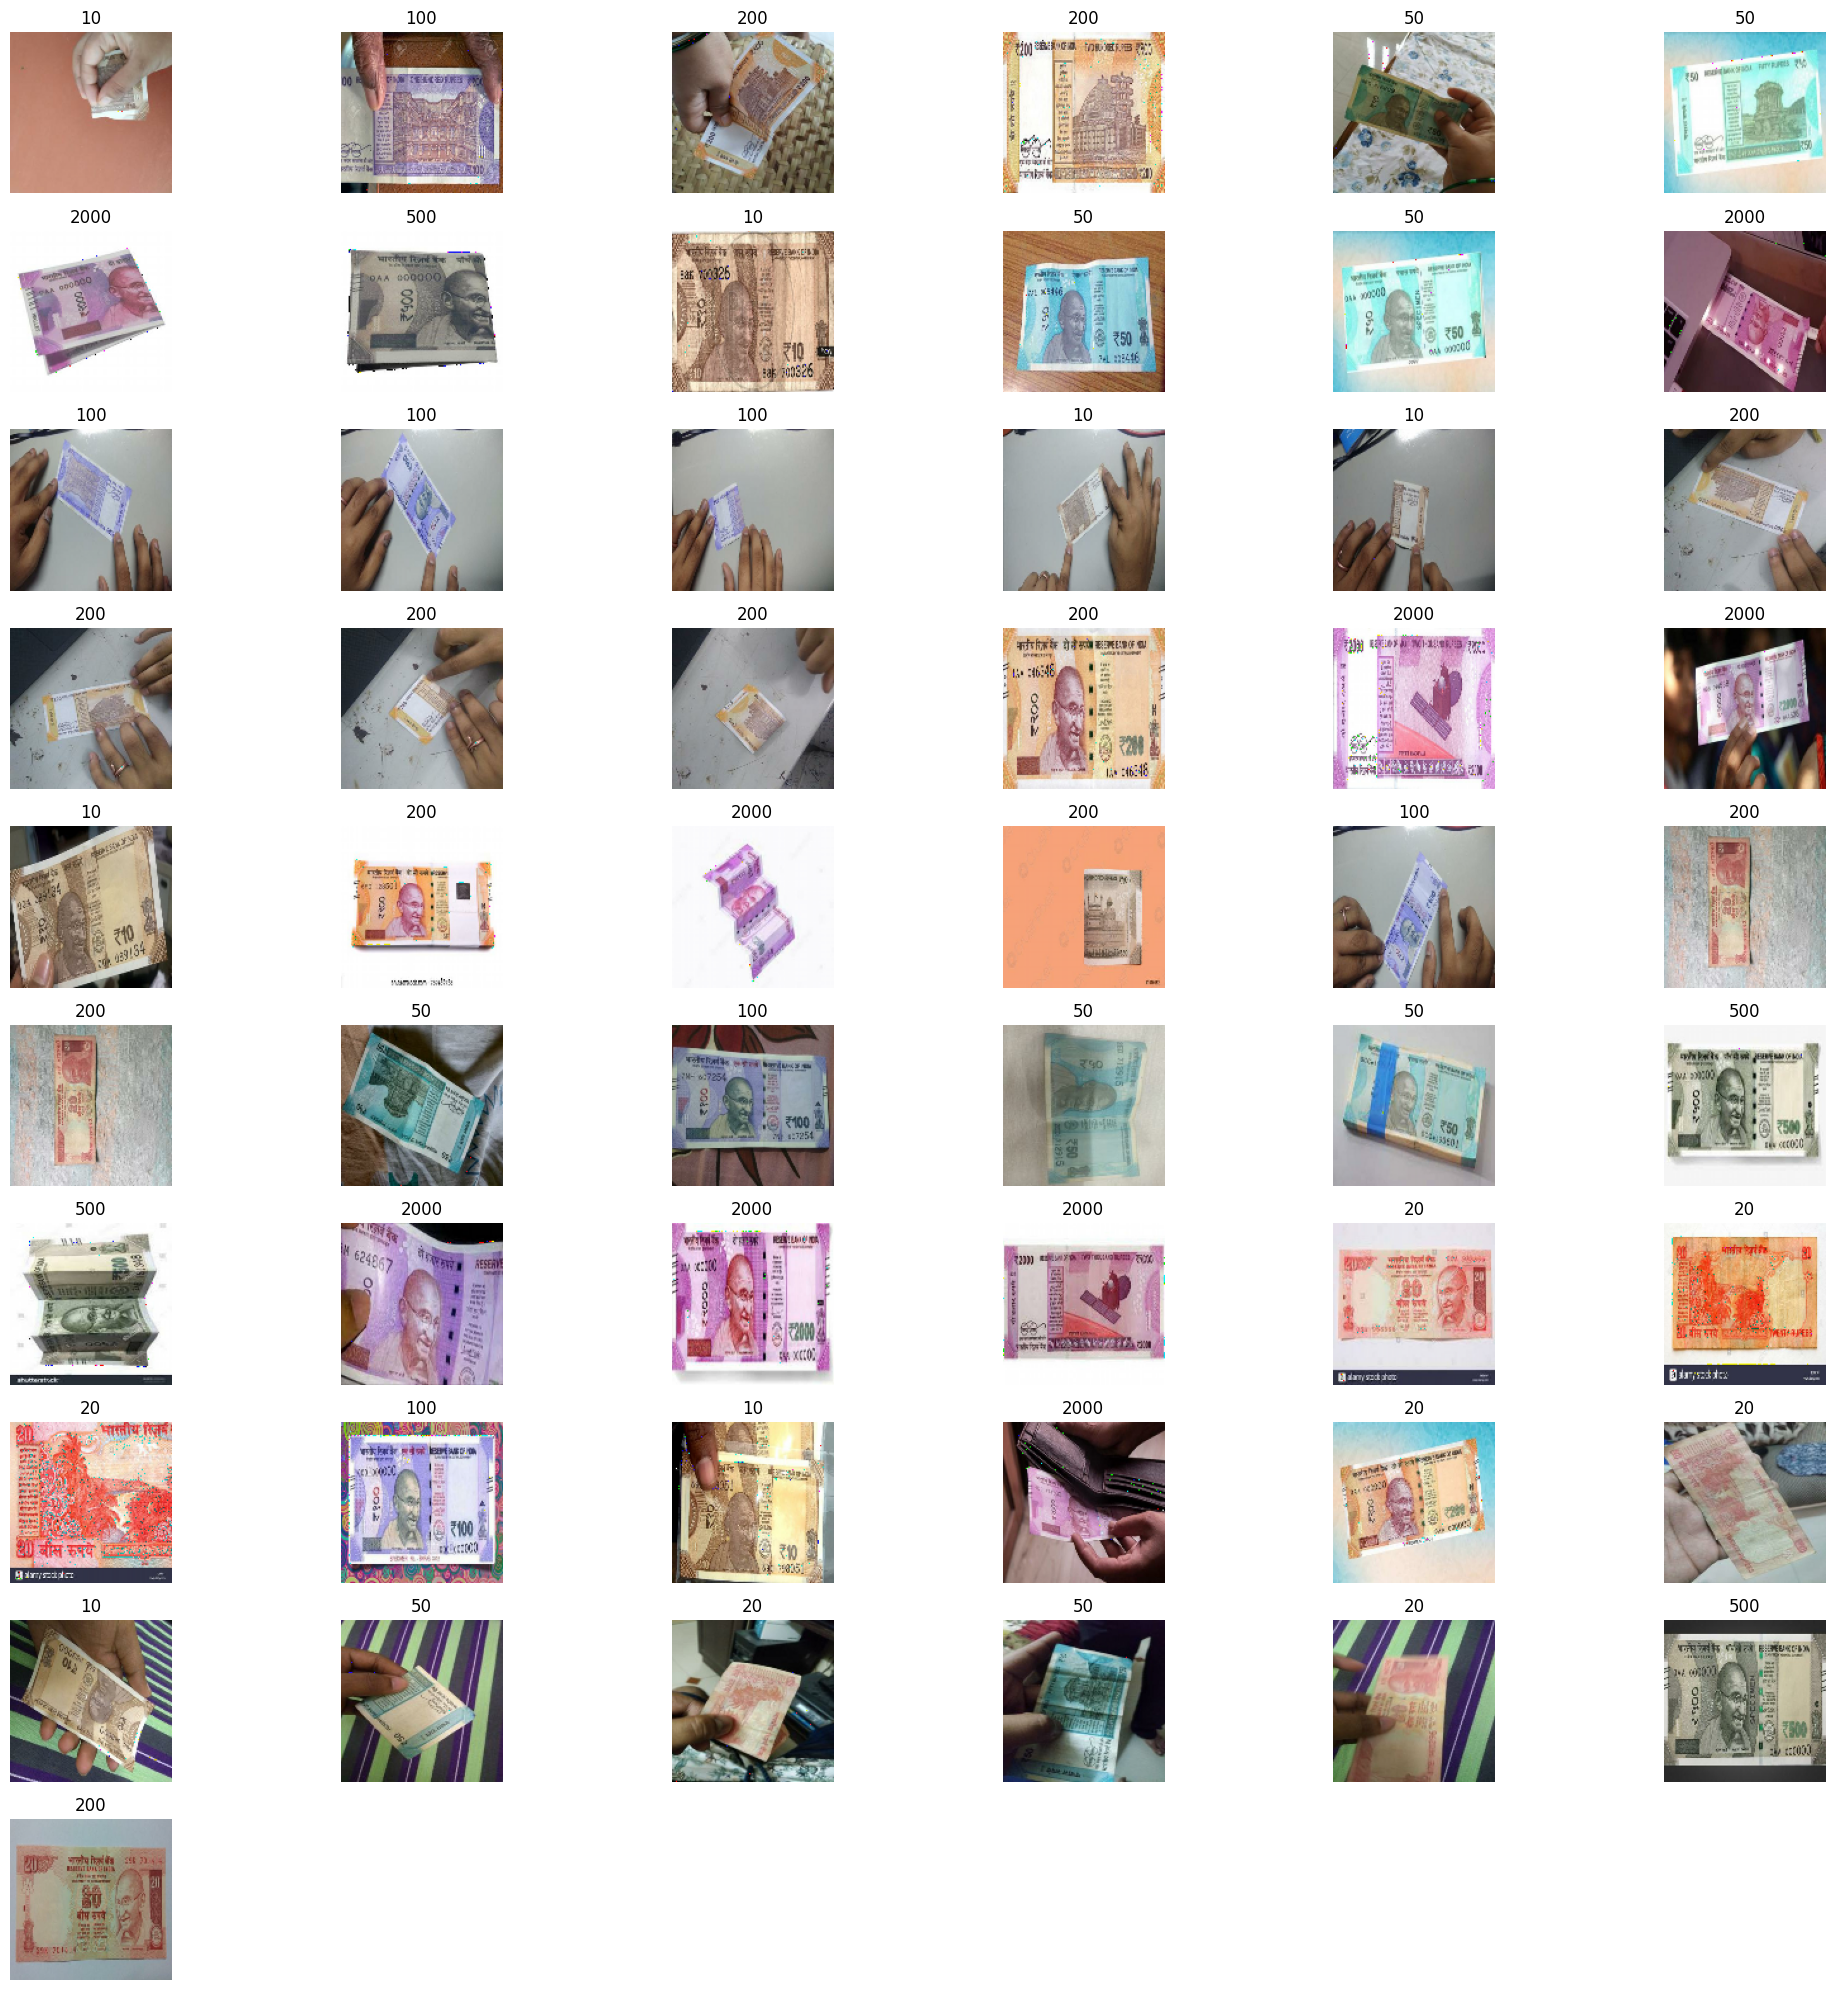

In [38]:
subplot_rows = num_test_images//6 + (1 if num_test_images%6!=0 else 0)
subplot_columns = num_test_images if num_test_images<6 else 6

plt.figure(figsize=(20, 20))
i = 0     # Iterator

for images in test_images:
  ax = plt.subplot(subplot_rows, subplot_columns, i + 1)
  plt.imshow((np.squeeze(images) * 255).astype(np.uint8), cmap = 'gray')
  plt.title(pred_output_labels[i])
  plt.axis("off")
  i = i + 1

plt.tight_layout()
plt.show()

##**Saving the model**

In [43]:
model.save(r'C:\Users\yogan\Downloads\Indian-Currency-Classification\Indian-Currency-Classification\model.h5')  # Save in H5 format


##**Loading the saved model**


In [45]:
import tensorflow as tf

# Correct path to the .h5 model file
model_path = r'C:\Users\yogan\Downloads\Indian-Currency-Classification\Indian-Currency-Classification\model.h5'
infer_model = tf.keras.models.load_model(model_path)

# Check its architecture
infer_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 61, 61, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 61, 61, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 61, 61, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       921,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 7)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 947,769 (3.62 MB)

 Trainable params: 947,543 (3.61 MB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 2 (12.00 B)

##**Checking whether model loaded correctly**


In [1]:
val_loss, val_acc = infer_model.evaluate(validation_dataset, verbose='auto')
print(f"Restored model Validation:\n\tloss:{val_loss} \n\taccuracy:{val_acc}")

NameError: name 'infer_model' is not defined

#### *It did load as expected as the previous validation accuracy matches the current one.*